In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
print(tf. __version__)

2.2.0-rc3


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/clean_data.csv')

In [ ]:
df.shape

(684, 13)

In [ ]:
df.isnull().sum()

Requirement Text                      0
Type                                  0
Sensor context                      654
System context                      591
Transactional context               464
Network context                     639
Mobility context                    616
Social context                      630
Third party Software Integration    583
GUI                                 472
Search                              645
Misc                                684
clean_req_text                        0
dtype: int64

In [ ]:
df.fillna(0,axis=1,inplace =True)

In [ ]:
df.isnull().sum()

Requirement Text                    0
Type                                0
Sensor context                      0
System context                      0
Transactional context               0
Network context                     0
Mobility context                    0
Social context                      0
Third party Software Integration    0
GUI                                 0
Search                              0
Misc                                0
clean_req_text                      0
dtype: int64

In [ ]:
df = df.iloc[:,2:]
df.head()

,Sensor context,System context,Transactional context,Network context,Mobility context,Social context,Third party Software Integration,GUI,Search,Misc,clean_req_text
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,text element user interface present select lan...
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,english available language
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,dutch available language
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,sub app launcher add main app qualified progra...
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,sub app launcher main app delete qualified pro...


In [ ]:
df = df[['clean_req_text','Sensor context',	'System context','Transactional context',
         'Network context','Mobility context','Social context','Third party Software Integration','GUI','Search','Misc']]
df.head()

,clean_req_text,Sensor context,System context,Transactional context,Network context,Mobility context,Social context,Third party Software Integration,GUI,Search,Misc
0,text element user interface present select lan...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,english available language,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,dutch available language,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,sub app launcher add main app qualified progra...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,sub app launcher main app delete qualified pro...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
df.duplicated().sum()

13

In [ ]:
df_final = df[~df.duplicated()]

In [ ]:
df_final.duplicated().sum()

0

In [ ]:
df_final.shape

(671, 11)

In [ ]:
df_final.reset_index(inplace = True)

In [ ]:
df_final = df_final.iloc[:,1:]

In [ ]:
df_final.head(2)

,clean_req_text,Sensor context,System context,Transactional context,Network context,Mobility context,Social context,Third party Software Integration,GUI,Search,Misc
0,text element user interface present select lan...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,english available language,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
import re

import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def clean_data(text):
  #   # 2. Retaining only alphabets.
  text = re.sub("[^a-zA-Z]"," ",str(text))
  
  # 3. Converting to lower case and splitting
  word_tokens= text.lower().split()
  
  # 4. Remove stopwords
  le=WordNetLemmatizer()
  stop_words= set(stopwords.words("english"))     
  word_tokens= [le.lemmatize(w) for w in word_tokens if not w in stop_words] 
  cleaned_text=" ".join(word_tokens)
  
  return cleaned_text


In [ ]:
df_final['clean_req_text'].shape

(671,)

In [ ]:
df_final['clean'] = df_final['clean_req_text'].apply(clean_data)

In [ ]:
df_final['clean'][0]

'text element user interface present select language language selection requirement ucar num available language mention ucar ucar'

In [ ]:
sentences = df_final['clean'].tolist()

In [ ]:
sentences[:5]

['text element user interface present select language language selection requirement ucar num available language mention ucar ucar',
 'english available language',
 'dutch available language',
 'sub app launcher add main app qualified programmer',
 'sub app launcher main app delete qualified programmer']

In [ ]:
!pip install tensorflow
!pip install tensorflow_hub
!pip install bert-for-tf2

In [ ]:
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

In [ ]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [ ]:
tokenizer.tokenize(sentences[0])

['text',
 'element',
 'user',
 'interface',
 'present',
 'select',
 'language',
 'language',
 'selection',
 'requirement',
 'uc',
 '##ar',
 'nu',
 '##m',
 'available',
 'language',
 'mention',
 'uc',
 '##ar',
 'uc',
 '##ar']

In [ ]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0]))

[3793,
 5783,
 5310,
 8278,
 2556,
 7276,
 2653,
 2653,
 4989,
 9095,
 15384,
 2906,
 16371,
 2213,
 2800,
 2653,
 5254,
 15384,
 2906,
 15384,
 2906]

In [ ]:
def tokenize_text(sentence):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence))

In [ ]:
tokenized_sentences = [tokenize_text(sent) for sent in sentences]

In [ ]:
len(tokenized_sentences)

671

In [ ]:
tokenized_sentences[0]

[3793,
 5783,
 5310,
 8278,
 2556,
 7276,
 2653,
 2653,
 4989,
 9095,
 15384,
 2906,
 16371,
 2213,
 2800,
 2653,
 5254,
 15384,
 2906,
 15384,
 2906]

In [ ]:
y = df_final[['Sensor context',	'System context','Transactional context',
         'Network context','Mobility context','Social context','Third party Software Integration','GUI','Search','Misc']]

In [ ]:
y.head(2)

,Sensor context,System context,Transactional context,Network context,Mobility context,Social context,Third party Software Integration,GUI,Search,Misc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y.shape,len(tokenized_sentences)

((671, 10), 671)

In [ ]:
# text_with_len = [[sent, y[i], len(sent)] for i, sent in enumerate(tokenized_sentences)]

text_with_len = []

for i, sent in enumerate(tokenized_sentences):
  # print(y.iloc[i].values)
  text_with_len.append([sent, y.iloc[i].tolist(), len(sent)])

In [ ]:
text_with_len[:5]

[[[3793,
   5783,
   5310,
   8278,
   2556,
   7276,
   2653,
   2653,
   4989,
   9095,
   15384,
   2906,
   16371,
   2213,
   2800,
   2653,
   5254,
   15384,
   2906,
   15384,
   2906],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
  21],
 [[2394, 2800, 2653], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 3],
 [[3803, 2800, 2653], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 3],
 [[4942, 10439, 22742, 5587, 2364, 10439, 4591, 20273],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
  8],
 [[4942, 10439, 22742, 2364, 10439, 3972, 12870, 4591, 20273],
  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
  9]]

In [ ]:
import random
random.shuffle(text_with_len)

In [ ]:
text_with_len.sort(key=lambda x: x[2])

In [ ]:
text_with_len[:10]

[[[5227, 3189], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 2],
 [[3988, 3989, 2951], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3],
 [[11412, 3189, 3295], [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3],
 [[3295, 3945, 2311], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3],
 [[3295, 7276, 4949], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3],
 [[2825, 3945, 2711], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], 3],
 [[21854, 11563, 3193], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0], 3],
 [[9625, 4443, 5371], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3],
 [[8911, 5587, 2311], [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3],
 [[3803, 2800, 2653], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 3]]

In [ ]:
sorted_text_labels = [(text_lab[0], text_lab[1]) for text_lab in text_with_len]


In [ ]:
sorted_text_labels[:10]

[([5227, 3189], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([3988, 3989, 2951], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([11412, 3189, 3295], [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([3295, 3945, 2311], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([3295, 7276, 4949], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([2825, 3945, 2711], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]),
 ([21854, 11563, 3193], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]),
 ([9625, 4443, 5371], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([8911, 5587, 2311], [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ([3803, 2800, 2653], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0])]

In [ ]:
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_text_labels, output_types=(tf.int32, tf.int32))


In [ ]:
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes= (tf.TensorShape([None,]),tf.TensorShape([None,]))  )

In [ ]:
next(iter(batched_dataset))


(<tf.Tensor: shape=(32, 4), dtype=int32, numpy=
 array([[ 5227,  3189,     0,     0],
        [ 3988,  3989,  2951,     0],
        [11412,  3189,  3295,     0],
        [ 3295,  3945,  2311,     0],
        [ 3295,  7276,  4949,     0],
        [ 2825,  3945,  2711,     0],
        [21854, 11563,  3193,     0],
        [ 9625,  4443,  5371,     0],
        [ 8911,  5587,  2311,     0],
        [ 3803,  2800,  2653,     0],
        [ 8911,  6366,  2311,     0],
        [ 2394,  2800,  2653,     0],
        [ 9625,  4443,  5587, 11412],
        [ 3295,  3945,  4769,  2311],
        [ 2825,  2485,  8094,  3193],
        [ 5227,  3166,  5562,  5310],
        [ 3131,  6434,  6251,  5164],
        [ 2825,  3945,  2711,  2533],
        [ 2825,  2066,  3056,  8476],
        [ 2825, 24095,  4949,  3193],
        [ 3295,  3945, 13433,  2072],
        [ 2825,  2330,  8094,  3193],
        [ 2825,  3945,  2724,  3058],
        [13433,  2072,  2311,  5769],
        [ 2825,  6090,  4949,  3193],
  

In [ ]:
import math
TOTAL_BATCHES = math.ceil(len(sorted_text_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
print(TOTAL_BATCHES,TEST_BATCHES)
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

21 2


In [ ]:
!pip install --user tensorflow==2.2.0-rc3
!pip install numpy==1.19

In [ ]:
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Embedding,Dropout,Flatten,LSTM,SpatialDropout1D


vocab_size = len(tokenizer.vocab)
embed_dim =300

model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embed_dim))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(units=100, dropout=0.3,return_sequences=True))#,input_shape = (x_train[0].shape)
model.add(LSTM(units=200,return_sequences=False))
# model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(10,activation='sigmoid')) # sigmod for bin. classification.


In [ ]:
from tensorflow.keras.optimizers import Adam
# tf.keras.optimizers.Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = Adam( learning_rate= lr_schedule)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         9156600   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 300)         0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 100)         160400    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 32)                6432      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                5

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 600

checkpointer = ModelCheckpoint(filepath='/content/saved model/model.hdf5', verbose=1, save_best_only=True)

history = model.fit(train_data, epochs=num_epochs, validation_data=test_data, callbacks=[checkpointer], verbose=1)


Epoch 1/600
     19/Unknown - 6s 291ms/step - loss: 0.6924 - accuracy: 0.1005
Epoch 00001: val_loss improved from inf to 0.69148, saving model to /content/saved model/model.hdf5
19/19 [==============================] - 8s 427ms/step - loss: 0.6924 - accuracy: 0.1005 - val_loss: 0.6915 - val_accuracy: 0.1562
Epoch 2/600
19/19 [==============================] - ETA: 0s - loss: 0.6892 - accuracy: 0.1054
Epoch 00002: val_loss improved from 0.69148 to 0.68863, saving model to /content/saved model/model.hdf5
19/19 [==============================] - 7s 357ms/step - loss: 0.6892 - accuracy: 0.1054 - val_loss: 0.6886 - val_accuracy: 0.0781
Epoch 3/600
19/19 [==============================] - ETA: 0s - loss: 0.6818 - accuracy: 0.0840
Epoch 00003: val_loss improved from 0.68863 to 0.68418, saving model to /content/saved model/model.hdf5
19/19 [==============================] - 7s 367ms/step - loss: 0.6818 - accuracy: 0.0840 - val_loss: 0.6842 - val_accuracy: 0.0781
Epoch 4/600
19/19 [============

In [ ]:
# # my_callbacks = [
# #     EarlyStopping(patience=10)]
# history = model.fit(train_data,epochs=10000)#,callbacks = my_callbacks)

In [ ]:
train_loss_score=model.evaluate(train_data)
test_loss_score=model.evaluate(test_data)
print(train_loss_score)
print(test_loss_score)

2/2 [==============================] - 0s 15ms/step - loss: 0.3006 - accuracy: 0.4062
[0.0647980198264122, 0.6836903095245361]
[0.3006211519241333, 0.40625]


In [ ]:
from tensorflow.keras import models
model = models.load_model('/content/saved model/model.hdf5')

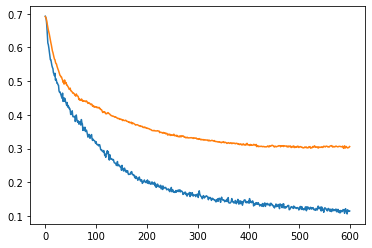

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

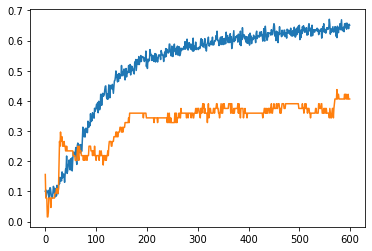

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])